In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [7]:
optim_types = ['mom', 'reg', 'catoni', 'trunc', 'pro']
# optim_types = ['catoni', 'pro', 'trunc_lin', 'trunc', 'mom', 'reg']
# optim_types = ['catoni', 'pro', 'reg', 'trunc_lin', 'trunc']
# optim_types = ['mom', ''] 
# noise_type = 'weibull'
noise_type = 'pareto'
scale = 1.0
p = 1.8
samples = 10000
dim = 20
n_seeds = 5

error_list = [[] for _ in range(len(optim_types))]
time_list = [[] for _ in range(len(optim_types))]
for optim_idx, optim_type in enumerate(optim_types):
#     for seed in [1,2,3,4,6,7,8,9,10]:
    for seed in range(1,n_seeds+1):
        filename = 'estimation_results/{:}-p{:.2f}-s{:.2f}-dim{:d}-size{:d}-{:}-seed{:d}.npy'.format(noise_type,p,scale,dim,samples,optim_type,seed)
        with open(filename,'rb') as f:
            data_per_seed=np.load(f, allow_pickle=True)
            error_list[optim_idx].append(data_per_seed['error_list'])
#             print(data_per_seed['optim_params'][best_opt_list[optim_idx]])
#             time_list[optim_idx].append(data_per_seed['time_list'])

MoM: 6.56(+-0.13)
Ridge: 1.04(+-0.53)
Catoni's M: 1.14(+-0.27)
Trunc: 0.60(+-0.06)
PRo: 0.71(+-0.19)


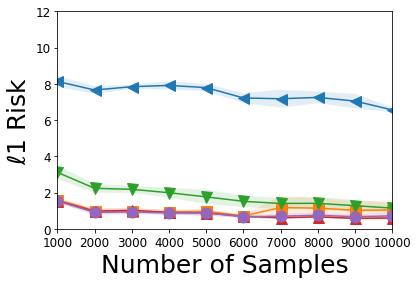

In [9]:
x_list = range(1000,11000, 1000)
best_opt_list = []
for optim_idx, optim_type in enumerate(optim_types):
    algo_label = optim_type
    mean_list = np.mean(error_list[optim_idx],axis=0)
#     mean_time_list = np.mean(time_list[optim_idx],axis=0)
#     print(optim_type)
#     print(mean_list.shape)
    std_list = np.std(error_list[optim_idx],axis=0)
#     std_time_list = np.std(time_list[optim_idx],axis=0)
    a = 0.5
    if 'catoni' in optim_types[optim_idx]:
        algo_label = 'Catoni\'s M'
        m='v'
    elif 'reg' in optim_types[optim_idx]:
        algo_label = 'Ridge'
        m='s'
    elif 'trunc_lin' in optim_types[optim_idx]:
        algo_label = 'Truncated Linear'
        m='>'
    elif 'trunc' in optim_types[optim_idx]:
        algo_label = 'Trunc'
        m='^'
    elif 'pro' in optim_types[optim_idx]:
        algo_label = 'PRo'
        m='o'
    elif 'mom' in optim_types[optim_idx]:
        algo_label = 'MoM'
        m='<'
#     elif 'RobustUCB-Truncated-Mean' in algos_name[algo_type_idx]:
#         algo_label = 'RobustUCB'
#         m='<'
#     elif 'DSEE' in algos_name[algo_type_idx]:
#         algo_label = 'DSEE'
#         m='>'
#     elif 'GSR' in algos_name[algo_type_idx]:
#         algo_label = 'GSR'
#         m='>'
        
    best_opt_idx = np.argmin(mean_list[:,-1])
    best_opt_list.append(best_opt_idx)
    init_idx = 0
    plt.fill_between(x_list[init_idx:],mean_list[best_opt_idx][init_idx:]-a*std_list[best_opt_idx][init_idx:],mean_list[best_opt_idx][init_idx:]+a*std_list[best_opt_idx][init_idx:],alpha=0.13)
    plt.plot(x_list[init_idx:],mean_list[best_opt_idx][init_idx:],label=algo_label, marker=m, ms=11, markevery=1)
    print("{:}: {:.2f}(+-{:.2f})".format(algo_label,mean_list[best_opt_idx][-1],a*std_list[best_opt_idx][-1]))
#     print("{:}: {:.2f}(+-{:.2f}), {:.5f}(+-{:.5f})".format(algo_label,mean_list[best_opt_idx][-1],a*std_list[best_opt_idx][-1],mean_time_list[best_opt_idx][-1]*1000.,std_time_list[best_opt_idx][-1]*1000.))
    
plt.ylim([0., 12.])
plt.xlim([np.min(x_list),np.max(x_list)])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(" ",fontsize=25)
plt.ylabel(" ",fontsize=25)
plt.xlabel("Number of Samples",fontsize=25)
plt.ylabel("$\ell1$ Risk",fontsize=25)
# plt.legend(prop={'size' : 15})
plt.show()

In [4]:
optim_types = ['catoni', 'mom', 'pro', 'reg', 'trunc_lin', 'trunc']
# optim_types = ['catoni', 'pro', 'reg', 'trunc_lin', 'trunc']
# optim_types = ['mom', '']
# noise_type = 'weibull'
n = 10000
n_seeds = 5

error_list = [[] for _ in range(len(optim_types))]
time_list = [[] for _ in range(len(optim_types))]
for optim_idx, optim_type in enumerate(optim_types):
#     for seed in [1,2,3,4,6,7,8,9,10]:
    for seed in range(1,n_seeds+1):
        filename = 'estimation_movielens_results/movielens-size{:d}-{:}-seed{:d}.npy'.format(n,optim_type,seed)
        with open(filename,'rb') as f:
            data_per_seed=np.load(f)
            error_list[optim_idx].append(data_per_seed['error_list'])
            time_list[optim_idx].append(data_per_seed['time_list'])

In [5]:
x_list = range(1,10+1)

for optim_idx, optim_type in enumerate(optim_types):
    algo_label = optim_type
    mean_list = np.mean(error_list[optim_idx],axis=0)
    mean_time_list = np.mean(time_list[optim_idx],axis=0)
#     print(optim_type)
#     print(mean_list.shape)
    std_list = np.std(error_list[optim_idx],axis=0)
    a = 0.25
    if 'catoni' in optim_types[optim_idx]:
        algo_label = 'Catoni\'s M'
        m='v'
    elif 'reg' in optim_types[optim_idx]:
        algo_label = 'Ridge'
        m='s'
    elif 'trunc_lin' in optim_types[optim_idx]:
        algo_label = 'Truncated Linear'
        m='>'
    elif 'trunc' in optim_types[optim_idx]:
        algo_label = 'Trunc'
        m='^'
    elif 'pro' in optim_types[optim_idx]:
        algo_label = 'PRo'
        m='o'
    elif 'mom' in optim_types[optim_idx]:
        algo_label = 'MoM'
        m='<'
#     elif 'RobustUCB-Truncated-Mean' in algos_name[algo_type_idx]:
#         algo_label = 'RobustUCB'
#         m='<'
#     elif 'DSEE' in algos_name[algo_type_idx]:
#         algo_label = 'DSEE'
#         m='>'
#     elif 'GSR' in algos_name[algo_type_idx]:
#         algo_label = 'GSR'
#         m='>'
        
    best_opt_idx = np.argmin(mean_list)
    print(algo_label,"L1 Loss:",mean_list[best_opt_idx][0], std_list[best_opt_idx][0])
    print(algo_label,"Time:",np.mean(mean_time_list[best_opt_idx]))

Catoni's M L1 Loss: 0.8963512098111306 0.006969704603252122
Catoni's M Time: 132.24322690963746
MoM L1 Loss: 1.0824327705236534 0.01770732803050372
MoM Time: 1.6637601852416992
PRo L1 Loss: 0.9105665647239988 0.0043953576913063385
PRo Time: 1.928016996383667
Ridge L1 Loss: 0.921772457980245 0.0029208297858197996
Ridge Time: 0.04999380111694336
Truncated Linear L1 Loss: 0.921772457973759 0.002920829778794488
Truncated Linear Time: 2.5640031814575197
Trunc L1 Loss: 0.9217724579760853 0.0029208297920633197
Trunc Time: 4.881475114822388
